In [3]:
from shapely.geometry import Polygon

coords1 = [(0., 0.), (0., 0.), (0., 0.), (0., 0.)]
# coords1 = ((0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0))
# coords1 = ((0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0))
poly1 = Polygon(coords1)

coords2 = [(0.5, 0.5), (0.5, 1.5), (1.5, 1.5), (1.5, 0.5)]
poly2 = Polygon(coords2)

In [4]:
# plot the polygon 

import matplotlib.pyplot as plt
import numpy as np

def plot_poly(poly: Polygon):
    fig, ax = plt.subplots()
    ax.plot(*poly.exterior.xy)
    ax.set_aspect('equal')
    plt.show()

# function plot two polygons overlapped on same plot
# def plot_polygons(poly1: Polygon, poly2: Polygon):
#     fig, ax = plt.subplots()
#     ax.plot(*poly1.exterior.xy)
#     ax.plot(*poly2.exterior.xy)
#     ax.set_aspect('equal')
#     plt.show()
    
# function to plot multiple polygons
def plot_polygons(polygons):
    fig, ax = plt.subplots()
    for poly in polygons:
        ax.plot(*poly.exterior.xy)
    ax.set_aspect('equal')
    plt.show()

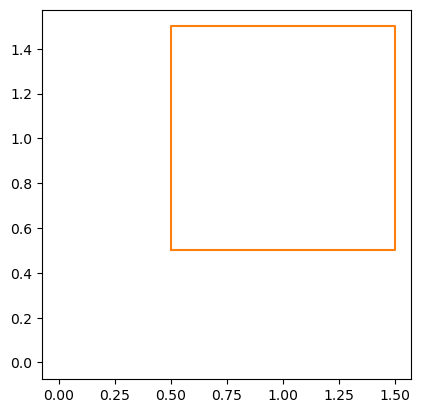

In [5]:
plot_polygons((poly1, poly2))

In [6]:
from shapely.set_operations import  intersection

# common = intersection(poly1, poly2)
common = poly1.intersection(poly2)
total = poly1.union(poly2)

In [7]:
total.area

1.0

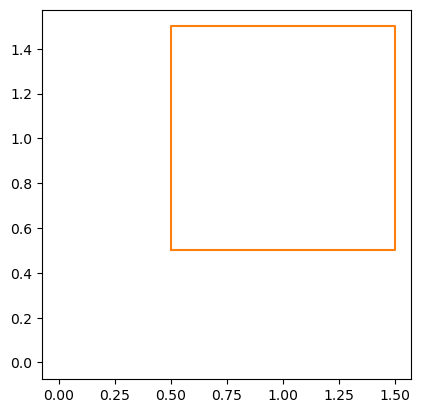

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

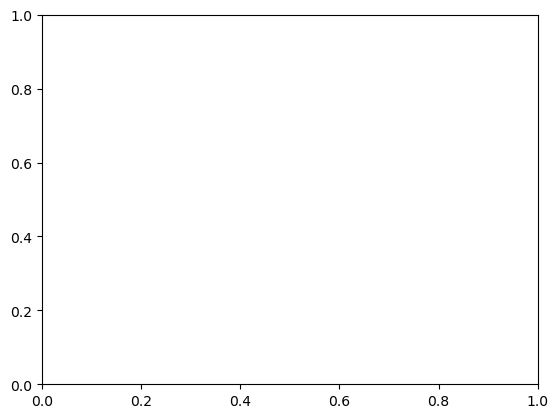

In [8]:
plot_polygons([poly1, poly2])
plot_polygons([total])

(4, 2)
Rectangle Coordinates: [(0.000574584387817545, -18.796875), (13.421874995612182, -18.796875), (13.421874995612182, -7.8671875), (0.000574584387817545, -7.8671875), (0.000574584387817545, -18.796875)]


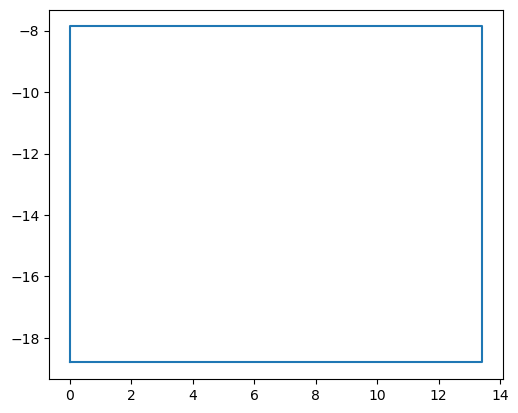

In [21]:
from shapely.geometry import Polygon
import numpy as np

def create_rectangle(cx, cy, length, width, angle):
    """
    Create a Shapely rectangle using center coordinates, dimensions, and rotation angle.
    
    Args:
        cx: X-coordinate of the center
        cy: Y-coordinate of the center
        length: Length of the rectangle (along its major axis)
        width: Width of the rectangle (along its minor axis)
        angle: Rotation angle in radians (counterclockwise)
    
    Returns:
        Shapely Polygon representing the rotated rectangle
    """
    # Half dimensions
    half_length = length / 2
    half_width = width / 2

    # Define the rectangle's corners relative to the center
    corners = np.array([
        [-half_length, -half_width],
        [half_length, -half_width],
        [half_length, half_width],
        [-half_length, half_width]
    ])

    # Rotation matrix
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])

    # Rotate and translate corners
    rotated_corners = np.dot(corners, rotation_matrix) + [cx, cy]
    print(rotated_corners.shape)
    # Create the rectangle as a Shapely Polygon
    return Polygon(rotated_corners)

# Example usage
cx, cy, l, w, ry = 6.71122479, -13.33203125, 13.421300411224365, 10.9296875, 0  # Example values
rectangle = create_rectangle(cx, cy, l, w, ry)


# Print the rectangle's coordinates
print("Rectangle Coordinates:", rectangle.exterior.coords[:])
plot_poly(rectangle)

